## **Домашняя работа 1.** (до 5 ноября)
Изучаем графовые *языковые модели*, построенные на основе совместной встречаемости слов. Это исследовательская работы, которая требует от вас как применения методов, которые мы изучали, так и качественного и количественного анализа результатов. Вы столкнетесь с вычислительными проблемами, если будете использовать методы, не думаю о том, какова их алгоритмическая сложность.  Далее будет описан примерный пул вопросов, на которые я ожидаю от вас ответов. Будьте уверены, ваша инициатива в исследовании будет оценена.    

In [ ]:
import nltk
nltk.download('brown')
from nltk.corpus import brown

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


Даннные для посторения графа уже здесь. Остались мелочи...

In [ ]:
brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [ ]:
brown.raw()[:100]

'\n\n\tThe/at Fulton/np-tl County/nn-tl Grand/jj-tl Jury/nn-tl said/vbd Friday/nr an/at investigation/nn'

In [ ]:
brown.sents()[:1]

[['The',
  'Fulton',
  'County',
  'Grand',
  'Jury',
  'said',
  'Friday',
  'an',
  'investigation',
  'of',
  "Atlanta's",
  'recent',
  'primary',
  'election',
  'produced',
  '``',
  'no',
  'evidence',
  "''",
  'that',
  'any',
  'irregularities',
  'took',
  'place',
  '.']]

In [ ]:
import networkx as nx
from typing import List
# create indirected graph (0.5 points)
# create directed grpah (0.5 points)
# create function which can work with different window size (from 1 to 7) (1 point)

def create_lm_coocurance(sentences:List[List[str]], window_size: int = 2):
  """your code here
  :sentences
  :return: graph object (networkx object), pairs of words that you add t the graph"""
  graph = nx.Graph()
  pairs = []

  ...
  return graph, pairs

g, ps = create_lm_coocurance(brown.sents()[:5])     

 Взял пять предложений из корпуса и построил на них граф, окно - 2 (слева два слова и справа два). 

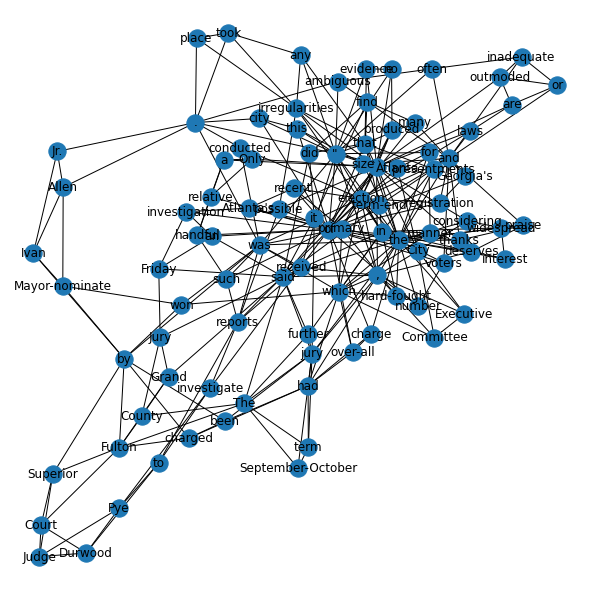

In [ ]:
import matplotlib.pyplot as plt
# nx.spring_layout(g) создает позиции для вершин графа, именно там они и будут отрисованы
# больше layouts тут, порпобуйте - не пожалеете 
# https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout
pos = nx.spring_layout(g)
# figsize=(8, 8) чем больше цифры здесь, тем больше картинка, все потому что отрисовка в networkx завязаы
plt.figure(figsize=(8, 8))
nx.draw(g, pos, with_labels=True)

## Descriptive analysis
Посмотрите сколько компонент, вершин, ребер. Если компонент несколько, не забывайте при анализе это учитывать. Плотность. Средняя степень вершины в графе. (2 points)

In [ ]:
 from networkx import density 
 "your code here and analysis also"

'your code here and analysis also'


*   Расcчитайте распределние степеней вершин внутри графа и постройте график (1 point)


*   Сделайте log-log scale для этих значений (1 point) 


*   Проверьте, если здесь powerlaw distribution (1 point) (то есть постройте апроксимирующую прямую) Дайте анализ результам у четом того, что ваш граф не является scale-free network 


тут есть пример - https://networkx.org/documentation/stable/auto_examples/drawing/plot_degree_histogram.html 

In [ ]:
import matplotlib.pyplot as plt
#plt.hist(....)

Используйте ваши знания о центральностях и об их применимости к тем или иным типам графов. Рассчитайте их (возможно на сабграфе), сделайте отображение графа, на котором размер вершины будет зависить от показателя центральности, ну или цветом, как здесь: https://networkx.org/documentation/stable/auto_examples/drawing/plot_random_geometric_graph.html#sphx-glr-auto-examples-drawing-plot-random-geometric-graph-py
(3 points)

Не забудь проанализировать, ведь визуализация (иногда) ключ к пониманию

# Поиск сообществ

Посмотрел, какие слова кластеризовались, но тут кажется ничего вразумительного

In [ ]:
from networkx.algorithms.community.centrality import girvan_newman
comp = girvan_newman(g)
res = {i:words for i, words in enumerate(tuple(sorted(c) for c in next(comp)))}
# бинарное разбиение исходного графа на сообщетва
res

{0: ["''",
  ',',
  '.',
  'Allen',
  'Atlanta',
  "Atlanta's",
  'City',
  'Committee',
  'County',
  'Executive',
  'Friday',
  'Fulton',
  "Georgia's",
  'Grand',
  'Ivan',
  'Jr.',
  'Jury',
  'Mayor-nominate',
  'Only',
  'September-October',
  'Superior',
  'The',
  '``',
  'a',
  'ambiguous',
  'an',
  'and',
  'any',
  'are',
  'been',
  'by',
  'charge',
  'charged',
  'city',
  'conducted',
  'considering',
  'deserves',
  'did',
  'election',
  'evidence',
  'find',
  'for',
  'further',
  'had',
  'handful',
  'hard-fought',
  'in',
  'inadequate',
  'interest',
  'investigation',
  'irregularities',
  'it',
  'jury',
  'laws',
  'manner',
  'many',
  'no',
  'number',
  'of',
  'often',
  'or',
  'outmoded',
  'over-all',
  'place',
  'possible',
  'praise',
  'presentments',
  'primary',
  'produced',
  'received',
  'recent',
  'registration',
  'relative',
  'reports',
  'said',
  'size',
  'such',
  'term',
  'term-end',
  'thanks',
  'that',
  'the',
  'this',
  'took

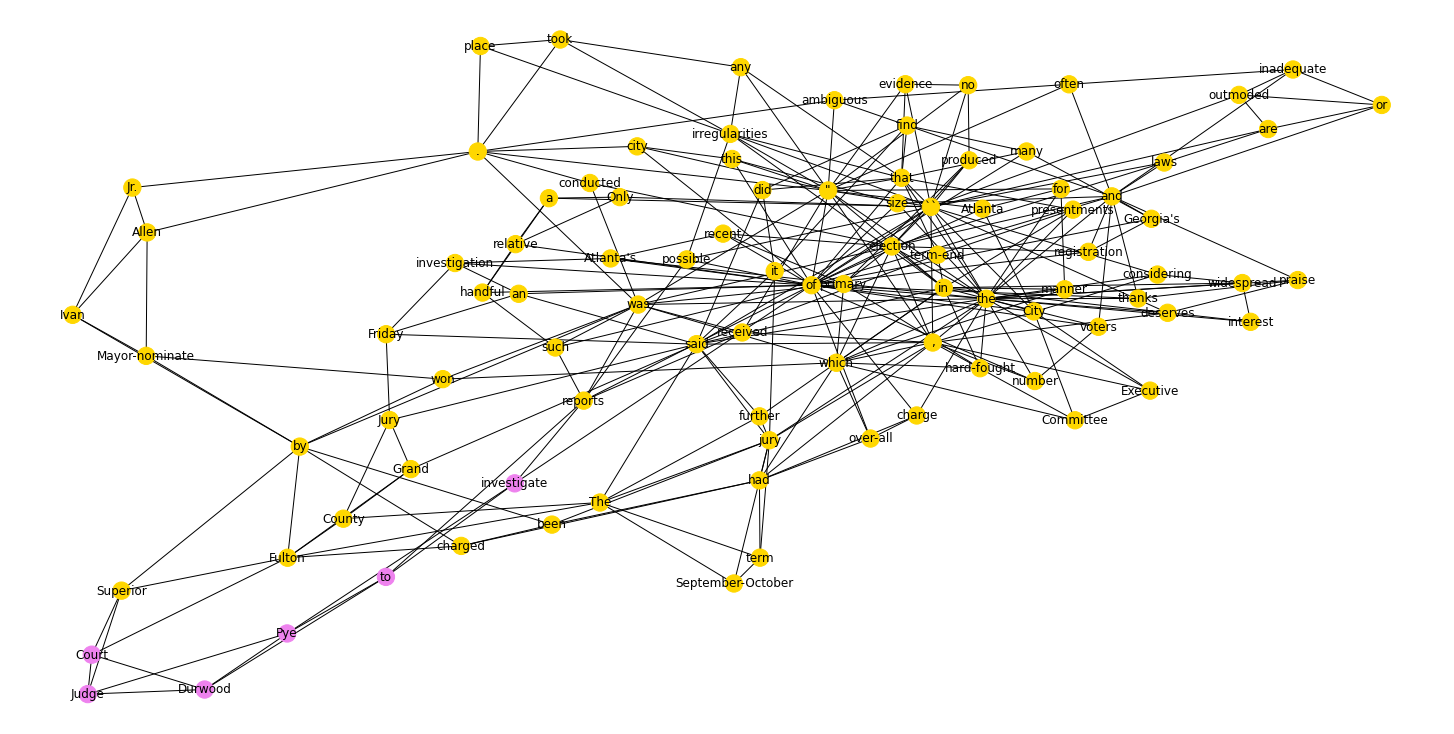

In [ ]:
subset_color = [
    "gold",
    "violet",
    "limegreen",
    "darkorange",
]
color = [ ]
for v in g.nodes():
  for i, words in res.items():
    if v in words:
      color.append(subset_color[i])
plt.figure(figsize=(20, 10))

nx.draw(g, pos, node_color=color, with_labels=True)
plt.show()

Ваша задача: применить методы поиска сообществ и попытаться интерпретировать выдачу (3 points)

In [ ]:
"your code here"

In [ ]:
import itertools
k = 2
# Посмотрим чуть глубже: 2 означает еще две итерации деления на сообщества  
for communities in itertools.islice(comp, k):
    print({indx: words for indx, words in enumerate(tuple(sorted(c) for c in communities))})  

{0: ['County', 'Friday', 'Fulton', 'Grand', 'Jury', 'September-October', 'Superior', 'The', 'an', 'been', 'by', 'charged', 'did', 'find', 'further', 'had', 'investigation', 'it', 'jury', 'said', 'term'], 1: ["''", ',', '.', 'Allen', 'Atlanta', "Atlanta's", 'City', 'Committee', 'Executive', "Georgia's", 'Ivan', 'Jr.', 'Mayor-nominate', 'Only', '``', 'a', 'ambiguous', 'and', 'any', 'are', 'charge', 'city', 'conducted', 'considering', 'deserves', 'election', 'evidence', 'for', 'handful', 'hard-fought', 'in', 'inadequate', 'interest', 'irregularities', 'laws', 'manner', 'many', 'no', 'number', 'of', 'often', 'or', 'outmoded', 'over-all', 'place', 'possible', 'praise', 'presentments', 'primary', 'produced', 'received', 'recent', 'registration', 'relative', 'reports', 'size', 'such', 'term-end', 'thanks', 'that', 'the', 'this', 'took', 'voters', 'was', 'which', 'widespread', 'won'], 2: ['Court', 'Durwood', 'Judge', 'Pye', 'investigate', 'to']}
{0: ['County', 'Friday', 'Fulton', 'Grand', 'Jur

Подарок для вас со стак оферфлоу: отрисовка графовой кластеризации с помощью дендрограммы (работает только с выходом из функции girvan_newman)

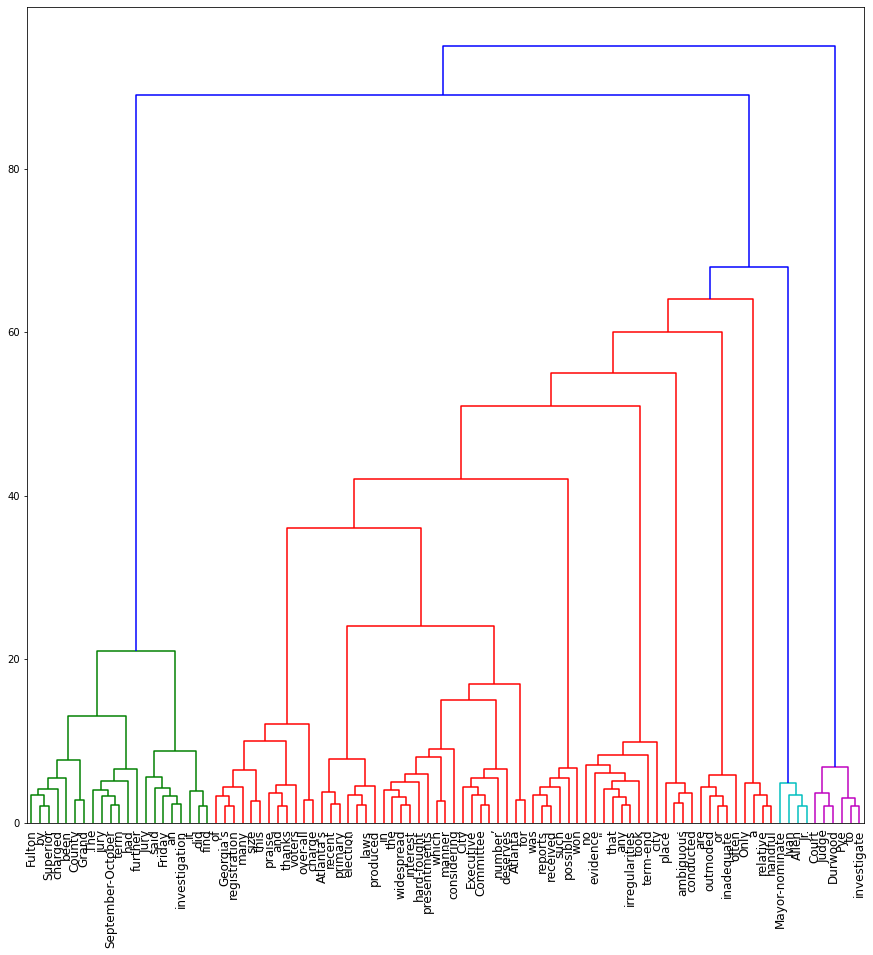

In [ ]:
import networkx as nx
from itertools import chain, combinations
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from networkx.algorithms.community.centrality import subset_rank_dict

# my function to get a merge height so that it is unique (probably not that efficient)
def get_merge_height(sub, node_labels, subset_rank_dict):
    sub_tuple = tuple(sorted([node_labels[i] for i in sub]))
    n = len(sub_tuple)
    other_same_len_merges = {k: v for k, v in subset_rank_dict.items() if len(k) == n}
    min_rank, max_rank = min(other_same_len_merges.values()), max(other_same_len_merges.values())
    range = (max_rank-min_rank) if max_rank > min_rank else 1
    return float(len(sub)) + 0.8 * (subset_rank_dict[sub_tuple] - min_rank) / range

def plot_dendrogram(G, method_to_find_community = girvan_newman):
  communities = list(method_to_find_community(G))
  # building initial dict of node_id to each possible subset:
  node_id = 0
  init_node2community_dict = {node_id: communities[0][0].union(communities[0][1])}
  for comm in communities:
      for subset in list(comm):
          if subset not in init_node2community_dict.values():
              node_id += 1
              init_node2community_dict[node_id] = subset

  # turning this dictionary to the desired format in @mdml's answer
  node_id_to_children = {e: [] for e in init_node2community_dict.keys()}
  for node_id1, node_id2 in combinations(init_node2community_dict.keys(), 2):
      for node_id_parent, group in init_node2community_dict.items():
          if len(init_node2community_dict[node_id1].intersection(init_node2community_dict[node_id2])) == 0 and group == init_node2community_dict[node_id1].union(init_node2community_dict[node_id2]):
              node_id_to_children[node_id_parent].append(node_id1)
              node_id_to_children[node_id_parent].append(node_id2)

  # also recording node_labels dict for the correct label for dendrogram leaves
  node_labels = dict()
  for node_id, group in init_node2community_dict.items():
      if len(group) == 1:
          node_labels[node_id] = list(group)[0]
      else:
          node_labels[node_id] = ''

  # also needing a subset to rank dict to later know within all k-length merges which came first
  subset_rank_dict = dict()
  rank = 0
  for e in communities[::-1]:
      for p in list(e):
          if tuple(p) not in subset_rank_dict:
              subset_rank_dict[tuple(sorted(p))] = rank
              rank += 1
  subset_rank_dict[tuple(sorted(chain.from_iterable(communities[-1])))] = rank

  # finally using @mdml's magic, slightly modified:
  G           = nx.DiGraph(node_id_to_children)
  nodes       = G.nodes()
  leaves      = set( n for n in nodes if G.out_degree(n) == 0 )
  inner_nodes = [ n for n in nodes if G.out_degree(n) > 0 ]

  # Compute the size of each subtree
  subtree = dict( (n, [n]) for n in leaves )
  for u in inner_nodes:
      children = set()
      node_list = list(node_id_to_children[u])
      while len(node_list) > 0:
          v = node_list.pop(0)
          children.add( v )
          node_list += node_id_to_children[v]
      subtree[u] = sorted(children & leaves)

  inner_nodes.sort(key=lambda n: len(subtree[n])) # <-- order inner nodes ascending by subtree size, root is last

  # Construct the linkage matrix
  leaves = sorted(leaves)
  index  = dict( (tuple([n]), i) for i, n in enumerate(leaves) )
  Z = []
  k = len(leaves)
  for i, n in enumerate(inner_nodes):
      children = node_id_to_children[n]
      x = children[0]
      for y in children[1:]:
          z = tuple(sorted(subtree[x] + subtree[y]))
          i, j = index[tuple(sorted(subtree[x]))], index[tuple(sorted(subtree[y]))]
          Z.append([i, j, get_merge_height(subtree[n], node_labels, subset_rank_dict), len(z)]) # <-- float is required by the dendrogram function
          index[z] = k
          subtree[z] = list(z)
          x = z
          k += 1

  plt.figure(figsize=(15, 15))
  dendrogram(Z, labels=[node_labels[node_id] for node_id in leaves])
  plt.xticks(fontsize=12)
  plt.show()#

plot_dendrogram(g)

Можете применить при подготовке корпуса любые другие фишки, котоыре вы умеете использовать, как то снятие частеречной омонимии и прочее. Инициатива поощряется, без нее 10 не поставлю :)